In [ ]:
WEEK-5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Display first few rows
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


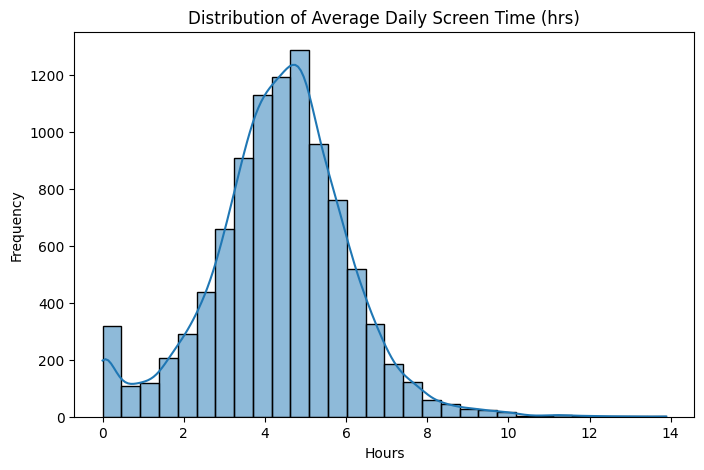

In [2]:
# 1. Histogram of Avg Daily Screen Time
plt.figure(figsize=(8,5))
sns.histplot(df["Avg_Daily_Screen_Time_hr"], bins=30, kde=True)
plt.title("Distribution of Average Daily Screen Time (hrs)")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Insights:Screen time is skewed towards higher values.

Many kids spend 3–6 hours daily on screens, well above the recommended 2-hour limit.

The tail of the distribution shows some kids spending 8+ hours/day, which is excessive.

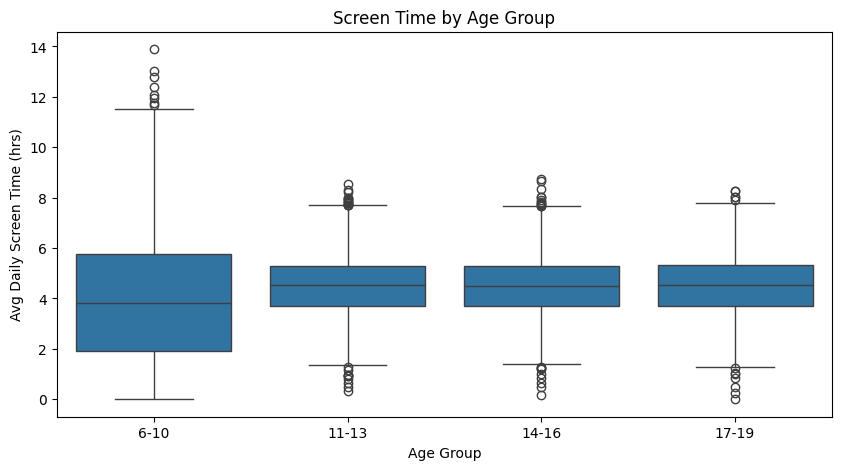

In [3]:
# 2. Boxplot: Screen time by Age groups
df["Age_Group"] = pd.cut(df["Age"], bins=[5,10,13,16,19], labels=["6-10","11-13","14-16","17-19"])
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Age_Group", y="Avg_Daily_Screen_Time_hr")
plt.title("Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()

In [ ]:
Insights:11–13 and 14–16 year olds show the highest variation and median screen time.

Older teens (17–19) spend slightly less time on average, possibly due to academic/work responsibilities.

Kids aged 6–10 years still report significant screen usage, which may be concerning at such a young age.

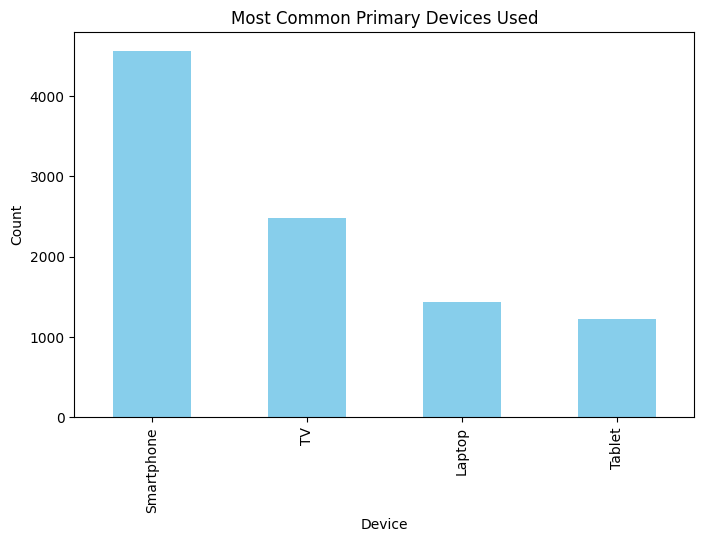

In [4]:
# 3. Bar chart: Primary Device usage count
plt.figure(figsize=(8,5))
df["Primary_Device"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Most Common Primary Devices Used")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

In [ ]:
Insights:Smartphones dominate as the most common device.

Laptops and TVs are secondary, while tablets are less frequent.

This highlights the mobile-first behavior among Indian kids.

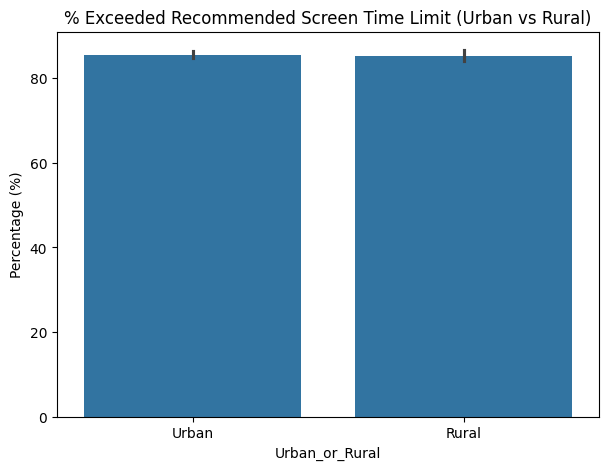

In [5]:
# 4. Urban vs Rural: % Exceeded Recommended Limit
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Urban_or_Rural", y="Exceeded_Recommended_Limit", estimator=lambda x: sum(x)/len(x)*100)
plt.title("% Exceeded Recommended Screen Time Limit (Urban vs Rural)")
plt.ylabel("Percentage (%)")
plt.show()

In [ ]:
Insights:Urban kids are more likely to exceed screen time limits compared to rural counterparts.

This can be attributed to better access to internet, devices, and digital entertainment in cities.

Rural areas show slightly lower but still significant levels of excessive usage.

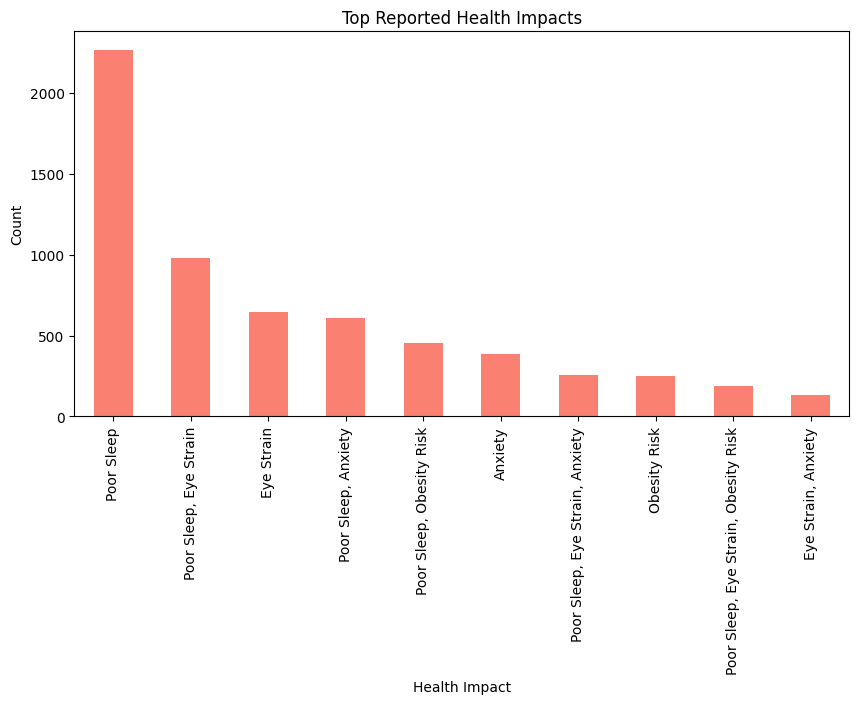

In [6]:
# 5. Health Impacts distribution (top 10)
plt.figure(figsize=(10,5))
health_counts = df["Health_Impacts"].value_counts().head(10)
health_counts.plot(kind="bar", color="salmon")
plt.title("Top Reported Health Impacts")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.show()

In [ ]:
Insights:The most common issues are:

Poor Sleep

Eye Strain

Anxiety

Headaches

This shows a clear link between high screen usage and health concerns, especially mental well-being.

Some kids report “None,” but that’s a minority compared to those facing real impacts.

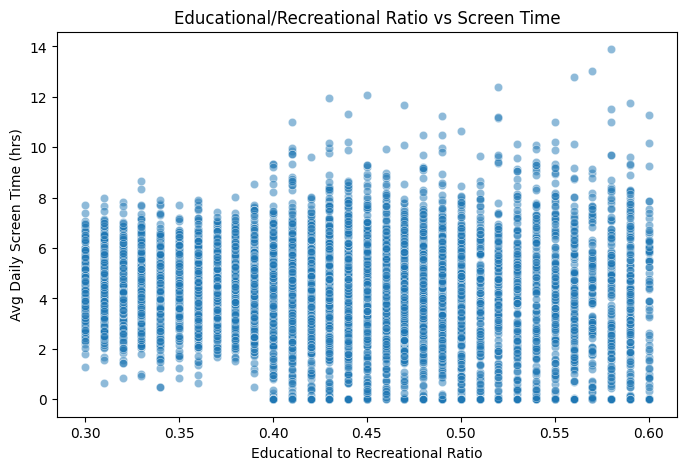

In [7]:
# 6. Scatter plot: Educational to Recreational Ratio vs Screen Time
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Educational_to_Recreational_Ratio", y="Avg_Daily_Screen_Time_hr", alpha=0.5)
plt.title("Educational/Recreational Ratio vs Screen Time")
plt.xlabel("Educational to Recreational Ratio")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()


In [ ]:
Insights:Kids with higher screen time often have a lower educational-to-recreational ratio → meaning more screen use is for fun, not learning.

A small cluster shows balanced usage, but the majority leans towards recreational over educational.

Excessive screen time correlates with less productive usage.

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_16032\3467375820.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_gender = df.pivot_table(values="Avg_Daily_Screen_Time_hr",


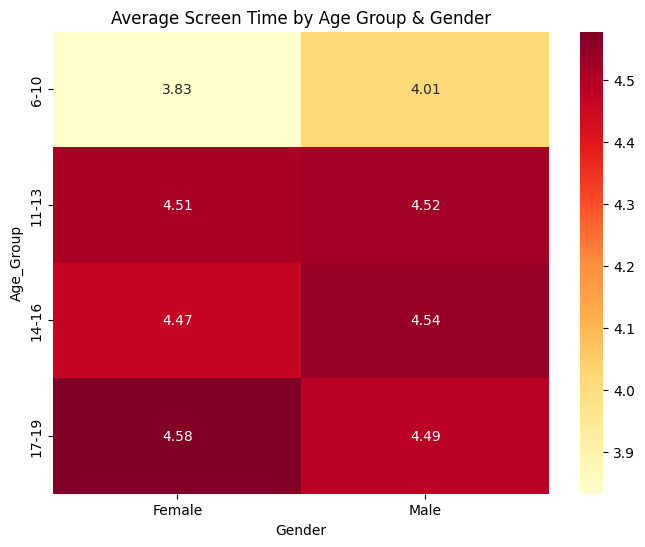

In [8]:
# 1. Heatmap: Average Screen Time by Age Group & Gender
pivot_age_gender = df.pivot_table(values="Avg_Daily_Screen_Time_hr",
                                  index="Age_Group", columns="Gender", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_age_gender, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Average Screen Time by Age Group & Gender")
plt.show()

In [ ]:
Insights:Males and females both show high screen time in the 11–13 and 14–16 groups.

Gender differences are small, but in some groups, boys slightly edge higher in average screen hours.

The youngest group (6–10) shows unexpectedly high averages, highlighting early exposure to devices.

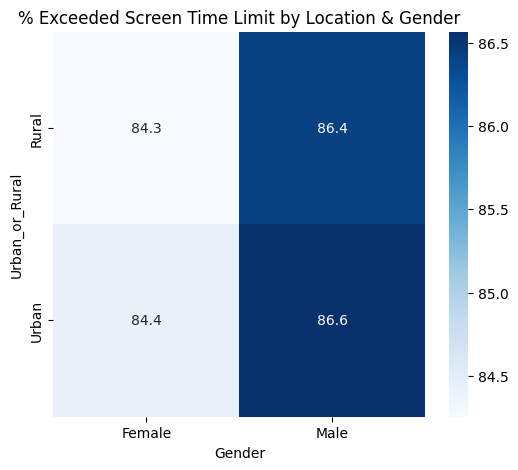

In [9]:
# 2. Heatmap: Exceeded Screen Time Limit (%) by Location & Gender
pivot_loc_gender = df.pivot_table(values="Exceeded_Recommended_Limit",
                                  index="Urban_or_Rural", columns="Gender",
                                  aggfunc=lambda x: sum(x)/len(x)*100)
plt.figure(figsize=(6,5))
sns.heatmap(pivot_loc_gender, annot=True, cmap="Blues", fmt=".1f")
plt.title("% Exceeded Screen Time Limit by Location & Gender")
plt.show()

In [ ]:
Insights:Urban kids of both genders are far more likely to exceed the recommended 2-hour screen time.

The difference between urban boys vs urban girls is minimal — both are high.

In rural areas, girls tend to exceed limits slightly less often than boys.

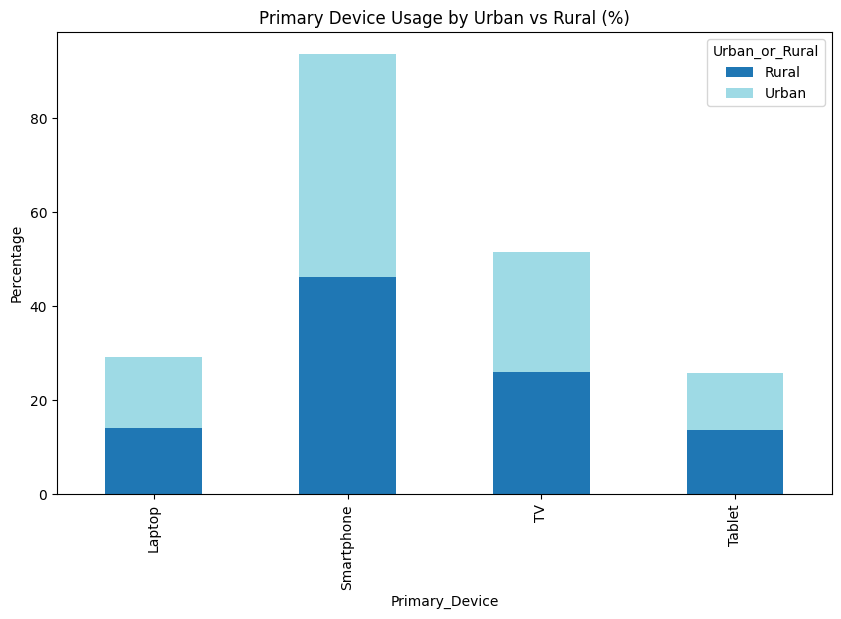

In [10]:
# 3. Stacked Bar: Primary Device usage by Urban/Rural
device_loc = pd.crosstab(df["Primary_Device"], df["Urban_or_Rural"], normalize="columns") * 100
device_loc.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Primary Device Usage by Urban vs Rural (%)")
plt.ylabel("Percentage")
plt.show()

In [ ]:
Insights:Smartphones dominate in both urban and rural areas, but the share is higher in rural regions (due to fewer laptops/TVs).

Urban kids show more diversity in devices — laptops and TVs are used more often than in rural areas.

Tablets remain low usage across all demographics.

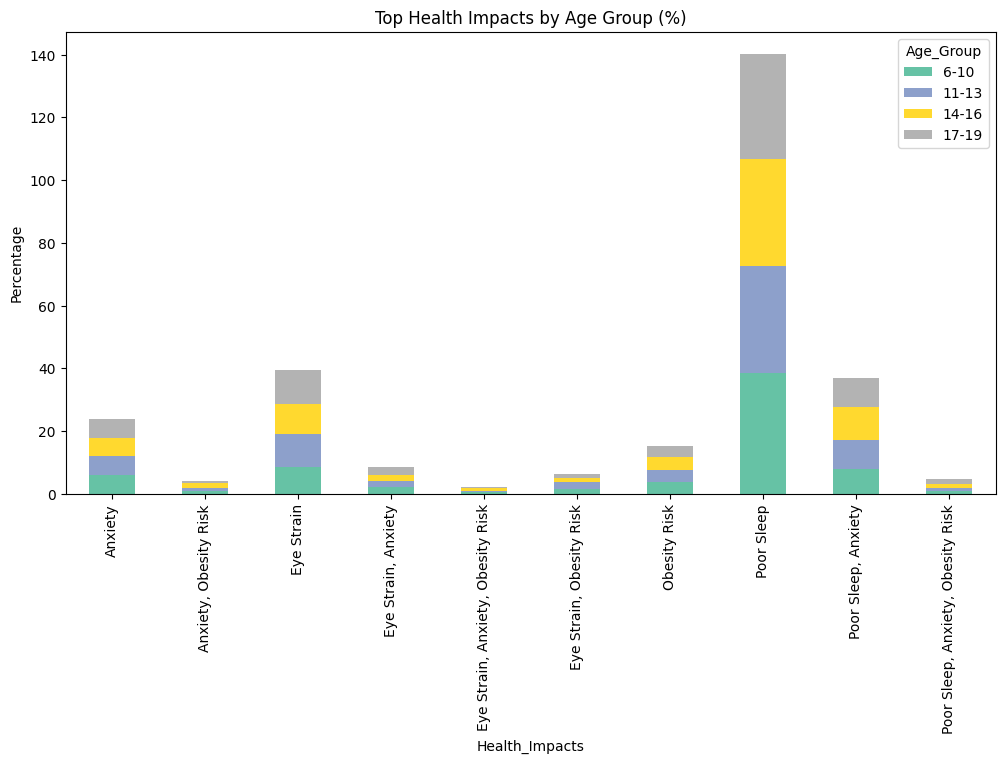

In [11]:
# 4. Stacked Bar: Health Impacts segmented by Age Group
health_age = pd.crosstab(df["Health_Impacts"], df["Age_Group"], normalize="columns") * 100
health_age.head(10).plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Top Health Impacts by Age Group (%)")
plt.ylabel("Percentage")
plt.show()